<a href="https://colab.research.google.com/github/Lanisha20/ECEN-360/blob/main/FHTH_Mockup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 🔮 From Hashtags to Hangars: Fashion Sales Forecast Model

# INSTALLS (Uncomment if running for first time)
!pip install xgboost textblob seaborn matplotlib snscrape pytrends prophet

Mean Absolute Error: 443.62
R² Score: 0.58


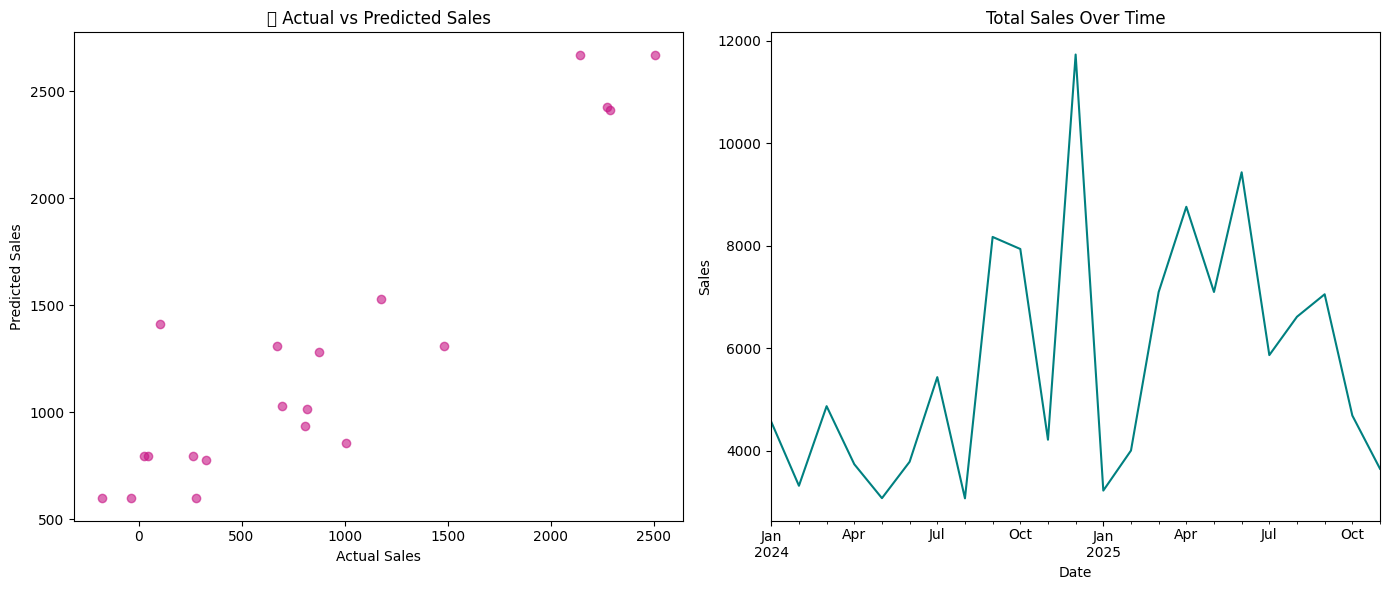

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import random
import datetime
import warnings

warnings.filterwarnings('ignore')

# 🧪 Step 1: Mocking the Dataset
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=100, freq='W')
trends = ['Barbiecore', 'Gorpcore', 'Cottagecore', 'Y2K', 'Grunge']

data = []
for date in dates:
    trend = random.choice(trends)
    mentions = np.random.randint(500, 5000)
    sentiment = round(np.random.uniform(-1, 1), 2)
    sales = int(mentions * (0.5 + 0.5 * sentiment) + np.random.randint(-500, 500))
    data.append([date, trend, mentions, sentiment, sales])

df = pd.DataFrame(data, columns=['date', 'trend', 'mentions', 'sentiment', 'sales'])

# 🧹 Step 2: Feature Engineering
df['trend_encoded'] = df['trend'].astype('category').cat.codes
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week.astype(int)

# Step 3: Model Training
X = df[['mentions', 'sentiment', 'trend_encoded', 'month', 'week']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=10, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 4: Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 5: Visualization
plt.figure(figsize=(14,6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumvioletred')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("💡 Actual vs Predicted Sales")

# Sales over time
plt.subplot(1, 2, 2)
monthly_sales = df[['date', 'sales']].set_index('date').resample('M').sum()
monthly_sales.plot(ax=plt.gca(), legend=False, color='teal')
plt.title("Total Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")

plt.tight_layout()
plt.show()

In [11]:
# import subprocess

# def scrape_tweets_subprocess(keyword, max_results=100):
#     command = f"snscrape --max-results {max_results} twitter-search '{keyword} since:2024-01-01' > tweets.txt"
#     subprocess.run(command, shell=True)
#     with open("tweets.txt", "r", encoding="utf-8") as f:
#         tweets = f.readlines()
#     return tweets

# tweets = scrape_tweets_subprocess("barbiecore", max_results=200)
# avg_sentiment = analyze_sentiment(tweets)
# print(f"Got {len(tweets)} tweets")
# print(f"Sentiment: {avg_sentiment}")


# # Twitter Scraper Function
# import snscrape.modules.twitter as sntwitter

# def scrape_tweets(keyword, max_results=100):
#     tweets = []
#     for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} lang:en since:2024-01-01').get_items()):
#         if i >= max_results:
#             break
#         tweets.append(tweet.content)
#     return tweets

# #Sentiment Analysis on Tweets
# from textblob import TextBlob

# def analyze_sentiment(tweets):
#     if not tweets:
#         return 0.0
#     sentiments = [TextBlob(tweet).sentiment.polarity for tweet in tweets]
#     return round(np.mean(sentiments), 3)

# # Example: Scrape tweets for "barbiecore"
# keyword = "barbiecore"
# tweets = scrape_tweets(keyword, max_results=200)
# avg_sentiment = analyze_sentiment(tweets)
# print(f"{len(tweets)} tweets found")
# print(f"Average Sentiment for #{keyword}: {avg_sentiment}")

# Phase 2: Google Trends Scraping
# Setup & Fetch Trends
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

def get_trend_data(keyword):
    pytrends.build_payload([keyword], cat=0, timeframe='now 7-d', geo='', gprop='')
    df = pytrends.interest_over_time()
    if not df.empty:
        return df[keyword].mean()  # avg search interest
    return 0

keyword = "barbiecore"
popularity_score = get_trend_data(keyword)
print(f"📈 Avg Google Trends Score for '{keyword}': {popularity_score}")


📈 Avg Google Trends Score for 'barbiecore': 10.284023668639053
